# Appendix: Modified Wavenumber

**강좌**: *기초 전산유체역학*

## Modified wavenumber

- 정확도를 평가하는 또 다른 방법

- 임의의 함수는 Fourier expansion을 이용하면 Sinusoidal 함수로 표현 가능

$$
f(x) = \sum_{n=0}^{\infty} a_n \cos(nx) + b_n \sin(nx)
$$

   * $n$ 이 커질수록 주기가 짧아짐 : High frequency
   
   * High frequency 항을 모사하기 위해서는 $\Delta x$ 를 줄이거나 정확도가 높아야 함
   
   * Finite difference 의 정확도에 따라 Low frequeny 항은 잘 모사할 수 있으나 High frequency 항은 왜곡될 수 있음

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

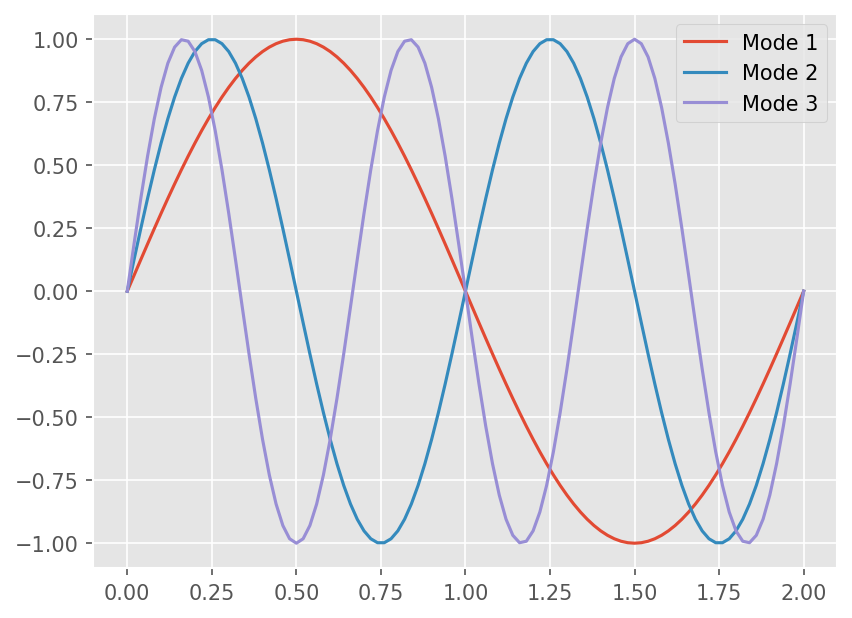

In [2]:
x = np.linspace(0, 2, 101)

legends = []
for i in range(1, 4):
    plt.plot(x, np.sin(np.pi*i*x))
    legends.append("Mode {}".format(i))
    
plt.legend(legends)

- Modified wavenumber
   * 간단한 Harmonic 함수에 대해 분석 
   
    $$
    f(x) = e^{ikx},
    $$

   * $[0, L]$ 영역을 N개의 격자로 나누었다고 생각하자. 이때 waveumber $k$를 다음과 같이 고려하자
   
    $$
    k = \frac{2\pi}{L} n, ~~~n=0, 1, 2, ... \frac{N}{2}
    $$

   * 이론적인 미분은
   
    $$
    f' = ikf
    $$

   * Finite difference
      - 격자점은
      
        $$
        x_j = \frac{L}{N} j ~~~j=0,1,2,...,N.
        $$

      - Central differnce에 대해 Harmonic 함수 적용
      
        $$
        f'_j = f'(x_j) = \frac{f(x_{j+1}) - f(x_{j-1})}{2\Delta x} 
        = \frac{e^{i 2\pi n (j+1)/N} - e^{i 2\pi n (j-1)/N}}{2\Delta x}
        = \frac{e^{i 2\pi n /N} - e^{-i 2\pi n /N}}{2\Delta x} f_j
        $$
        
        $$
        f'_j = i \frac{\sin(2\pi n/N)}{\Delta x} f_j = ik'f_j
        $$

        즉

        $$
        k' \Delta x = \sin(2\pi n/N) = \sin (k \Delta x)
        $$

Text(0, 0.5, "k'h")

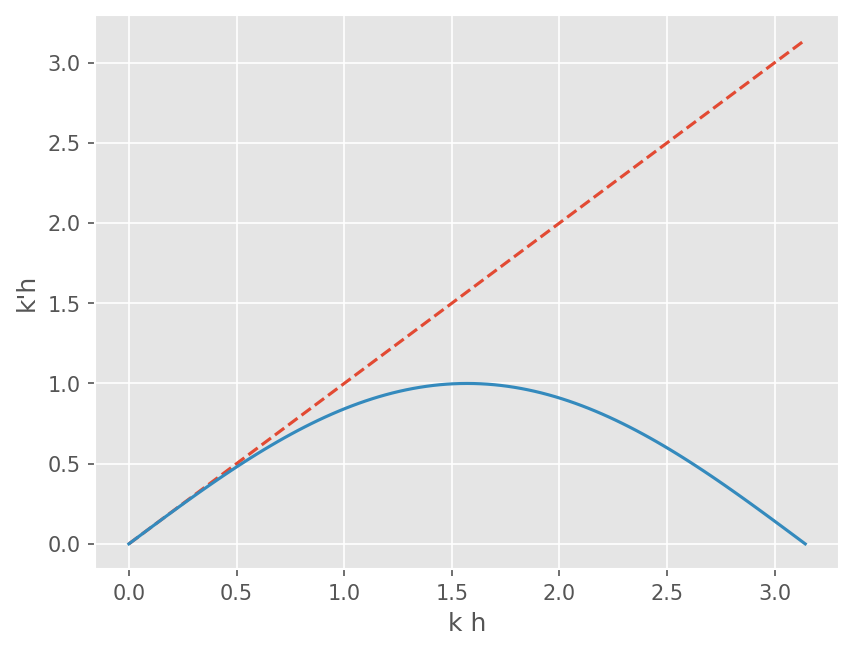

In [3]:
kh = np.linspace(0, np.pi, 101)
mkh = np.sin(kh)

plt.plot(kh, kh, linestyle='--')
plt.plot(kh, mkh)
plt.xlabel('k h')
plt.ylabel("k'h")

In [4]:
def forward_diff(f, x, dx):
    # Forward difference
    return (f(x+dx) - f(x)) / dx

def backward_diff(f, x, dx):
    # Backward difference
    return (f(x) - f(x-dx)) / dx

def central_diff(f, x, dx):
    # Central difference
    return (f(x+dx) - f(x-dx)) / (2*dx)

def compute(dx):
    x = np.linspace(0, 2*np.pi, 101)
    f = np.sin

    # Compute first derivatives
    exact = np.cos(x)
    fd = np.array([forward_diff(f, xi, dx) for xi in x])
    bd = np.array([backward_diff(f, xi, dx) for xi in x])
    cd = np.array([central_diff(f, xi, dx) for xi in x])
    
    return x, exact, fd, bd, cd

def plot(dx):
    x, exact, fd, bd, cd = compute(dx)

    # Plot
    plt.plot(x , exact)
    plt.plot(x, fd)
    plt.plot(x, bd)
    plt.plot(x, cd)

    plt.legend(['Exact', 'Forward Difference', 'Backward Difference', 'Central Difference'])
    plt.xlabel(r'x')
    plt.ylabel(r"$f'(x)$")
    plt.title("Comparison of finite difference @ $\Delta x$={} $\pi$".format(dx/np.pi))

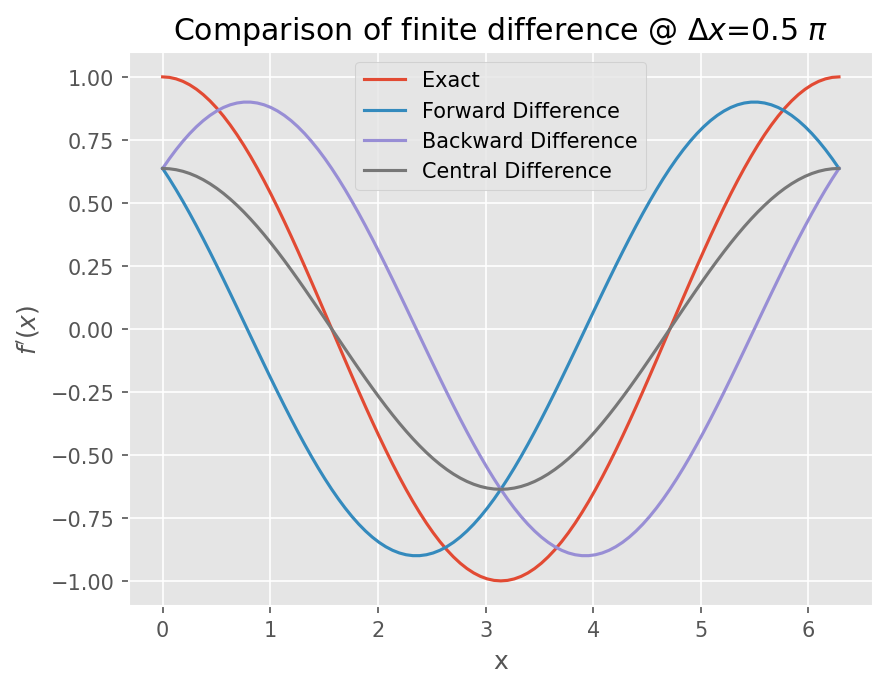

In [5]:
plot(0.5*np.pi)

In [6]:
plot(np.pi)